# Загрузка и предобработка

In [7]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate, KFold, train_test_split
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('/Users/moskvinanata/Documents/Магистратура/_УРФУ ИИ/Проектный практикум/ObesityDataSet.csv')

In [3]:
categorical_numeric_features = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Округляем каждую колонку до целого числа
for col in categorical_numeric_features:
    df[col] = df[col].round().astype(int)

In [4]:
## Сначала преобразуем категориальные переменные в числовые где это имеет смысл

# Преобразуем бинарные переменные
binary_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']
binary_mapping = {'no': 0, 'yes': 1, 'Female': 0, 'Male': 1}

for col in binary_columns:
    if col in df.columns:
        df[col] = df[col].map(binary_mapping)

# Преобразуем ординарные переменные с естественным порядком
ordinal_mappings = {
    'FCVC': {1: 1, 2: 2, 3: 3},  # частота овощей
    'NCP': {1: 1, 2: 2, 3: 3, 4: 4},  # количество приемов пищи
    'CAEC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'CH2O': {1: 1, 2: 2, 3: 3},  # потребление воды
    'FAF': {0: 0, 1: 1, 2: 2, 3: 3},  # физическая активность
    'TUE': {0: 0, 1: 1, 2: 2},  # время использования гаджетов
    'CALC': {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
    'MTRANS': {'Walking': 1, 'Bike': 2, 'Motorbike': 3, 'Automobile': 4, 'Public_Transportation': 5}
}

for col, mapping in ordinal_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

# Целевая переменная (можно закодировать по степени ожирения)
obesity_order = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
df['NObeyesdad'] = df['NObeyesdad'].map(obesity_order)

In [5]:
# Создадим BMI (Индекс Массы Тела) для лучшего понимания
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

In [6]:
print("\n=== УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ===")
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"{column}: {unique_count} уникальных значений")
    if unique_count <= 10:  # Показываем значения только если их немного
        print(f"   Значения: {df[column].unique()}")


=== УНИКАЛЬНЫЕ ЗНАЧЕНИЯ ===
Gender: 2 уникальных значений
   Значения: [0 1]
Age: 1402 уникальных значений
Height: 1574 уникальных значений
Weight: 1525 уникальных значений
family_history_with_overweight: 2 уникальных значений
   Значения: [1 0]
FAVC: 2 уникальных значений
   Значения: [0 1]
FCVC: 3 уникальных значений
   Значения: [2 3 1]
NCP: 4 уникальных значений
   Значения: [3 1 4 2]
CAEC: 4 уникальных значений
   Значения: [1 2 3 0]
SMOKE: 2 уникальных значений
   Значения: [0 1]
CH2O: 3 уникальных значений
   Значения: [2 3 1]
SCC: 2 уникальных значений
   Значения: [0 1]
FAF: 4 уникальных значений
   Значения: [0 3 2 1]
TUE: 3 уникальных значений
   Значения: [1 0 2]
CALC: 4 уникальных значений
   Значения: [0 1 2 3]
MTRANS: 5 уникальных значений
   Значения: [5 1 4 3 2]
NObeyesdad: 7 уникальных значений
   Значения: [1 2 3 4 0 5 6]
BMI: 1968 уникальных значений


# Создадим группировку по BMI и оценим эффективность

/var/folders/mb/2t9kszz95sx2wrf_719jnktw0000gn/T/ipykernel_46991/3486891304.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(obesity_order, rotation=45)
/var/folders/mb/2t9kszz95sx2wrf_719jnktw0000gn/T/ipykernel_46991/3486891304.py:67: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(obesity_order, rotation=45)


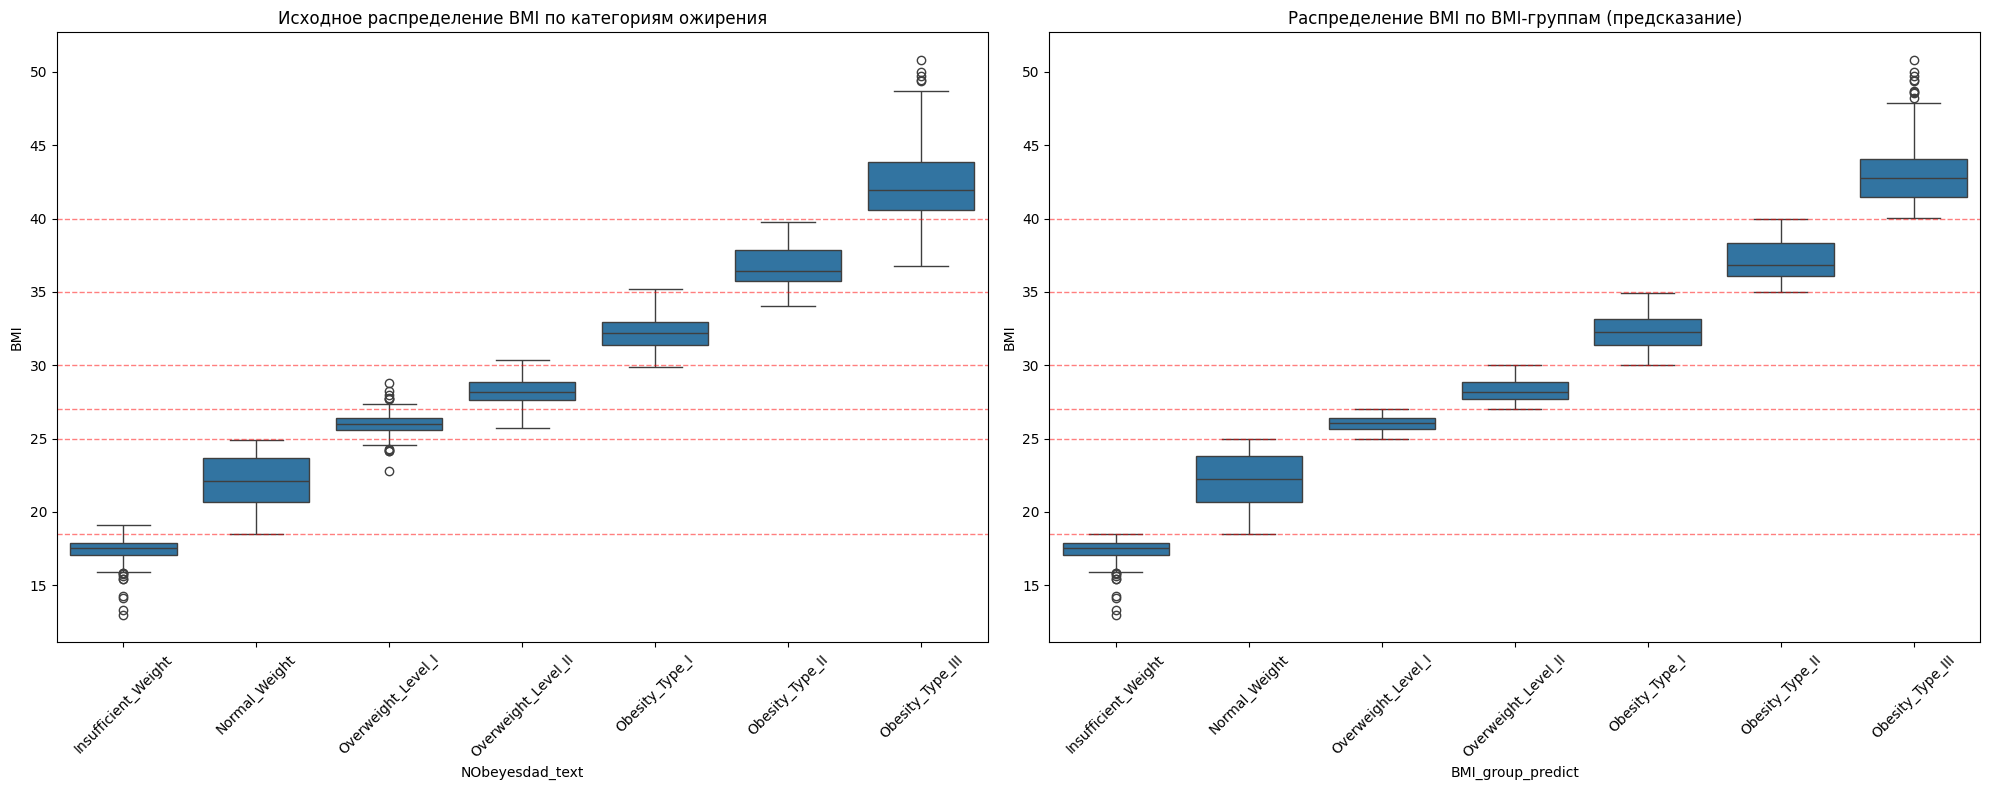

=== СРАВНЕНИЕ BMI-ГРУППИРОВКИ С РЕАЛЬНЫМИ ДАННЫМИ ===
Точность BMI-группировки: 0.9389 (93.89%)

Отчет по классификации:
                     precision    recall  f1-score   support

Insufficient_Weight       0.99      0.99      0.99       272
      Normal_Weight       0.95      0.99      0.97       287
 Overweight_Level_I       0.94      0.99      0.96       351
Overweight_Level_II       0.83      0.94      0.88       297
     Obesity_Type_I       1.00      0.83      0.91       324
    Obesity_Type_II       0.94      0.92      0.93       290
   Obesity_Type_III       0.96      0.93      0.94       290

           accuracy                           0.94      2111
          macro avg       0.94      0.94      0.94      2111
       weighted avg       0.94      0.94      0.94      2111



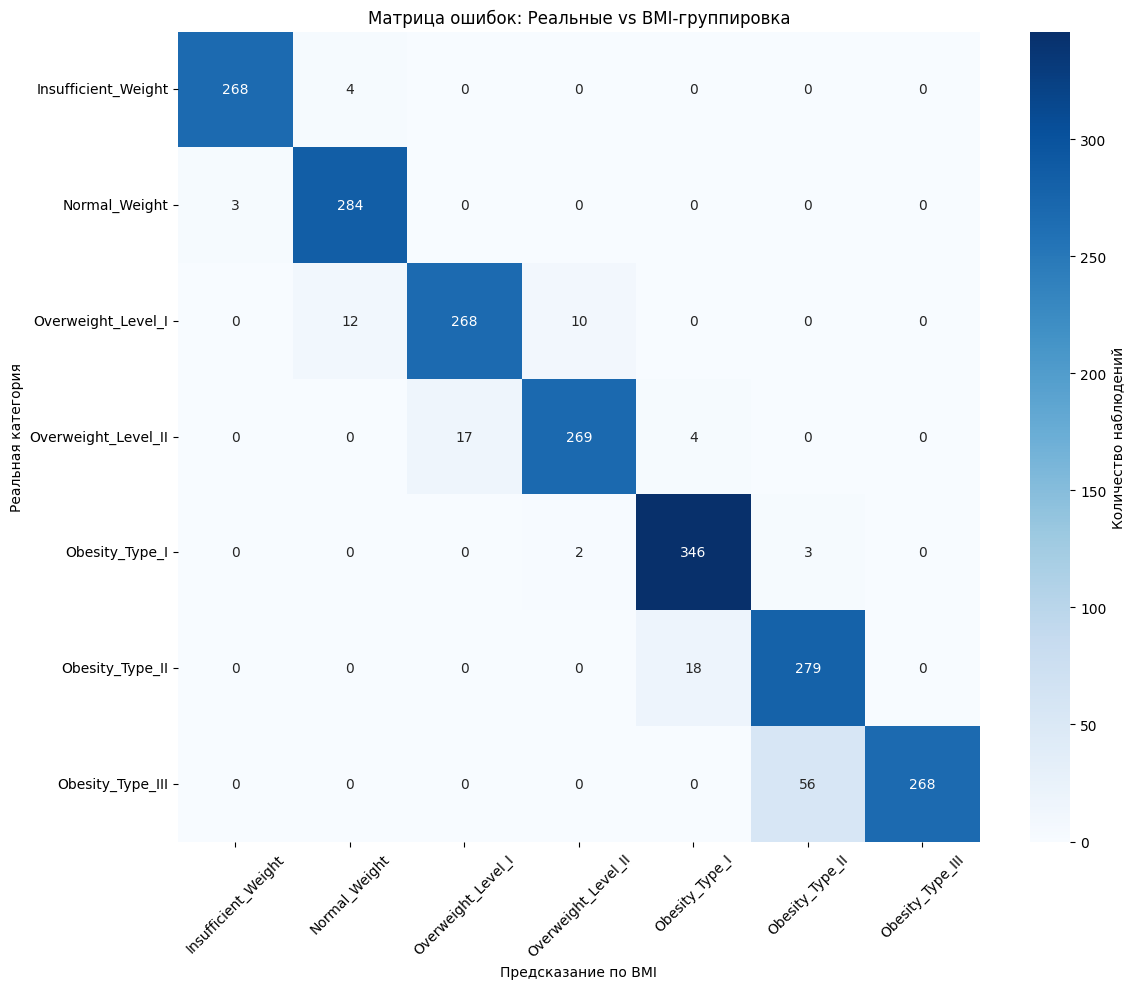


=== АНАЛИЗ РАСХОЖДЕНИЙ ===
Наиболее частые расхождения:
                                           Количество  Средний_BMI  Стд_BMI
Difference                                                                 
Obesity_Type_II vs Obesity_Type_III                56        38.71     1.03
Obesity_Type_I vs Obesity_Type_II                  18        34.55     0.27
Overweight_Level_I vs Overweight_Level_II          17        26.78     0.38
Normal_Weight vs Overweight_Level_I                12        24.44     0.59
Overweight_Level_II vs Overweight_Level_I          10        27.71     0.52
Normal_Weight vs Insufficient_Weight                4        18.81     0.29
Obesity_Type_I vs Overweight_Level_II               4        30.22     0.17
Insufficient_Weight vs Normal_Weight                3        18.49     0.00
Obesity_Type_II vs Obesity_Type_I                   3        35.10     0.09
Overweight_Level_II vs Obesity_Type_I               2        29.95     0.05


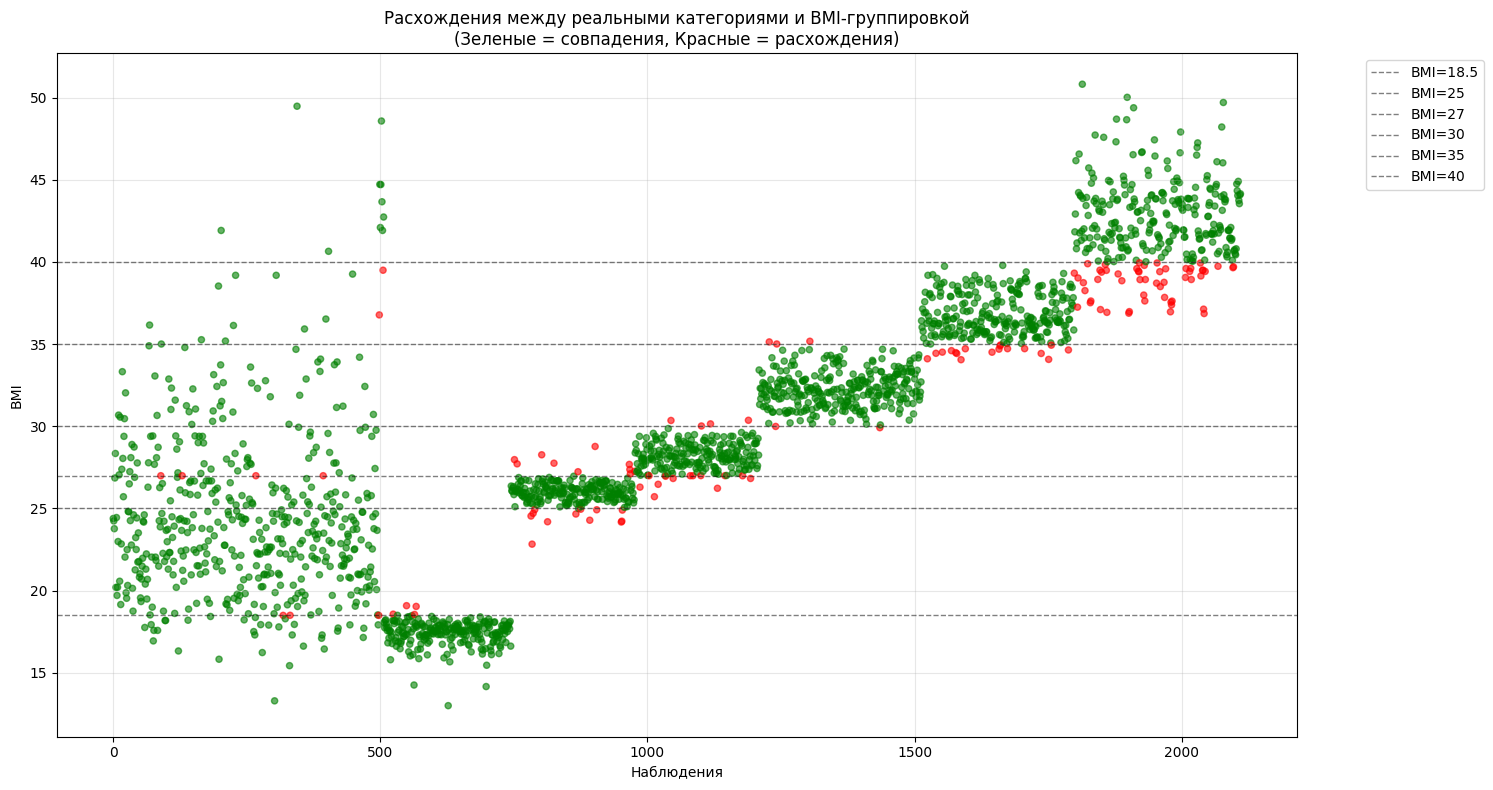


=== АНАЛИЗ ПО ГРАНИЦАМ BMI ===
                                     Граница  BMI_граница  Наблюдений_рядом  \
0       Insufficient_Weight -> Normal_Weight         18.5               309   
1        Normal_Weight -> Overweight_Level_I         25.0               393   
2  Overweight_Level_I -> Overweight_Level_II         27.0               514   
3      Overweight_Level_II -> Obesity_Type_I         30.0               318   
4          Obesity_Type_I -> Obesity_Type_II         35.0               281   
5        Obesity_Type_II -> Obesity_Type_III         40.0               216   

   Точность_рядом  
0           0.977  
1           0.929  
2           0.947  
3           0.975  
4           0.904  
5           0.819  

=== СВОДНАЯ СТАТИСТИКА ===
Общее количество наблюдений: 2111
Совпадений: 1982 (93.9%)
Расхождений: 129 (6.1%)

Реальные категории с наибольшим количеством расхождений:
  Obesity_Type_III: 56 расхождений (17.3% от категории)
  Overweight_Level_I: 22 расхождений (7.6% от кат

In [14]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Определяем медицинские границы BMI для каждой категории
bmi_boundaries = {
    'Insufficient_Weight': (0, 18.5),
    'Normal_Weight': (18.5, 25),
    'Overweight_Level_I': (25, 27),
    'Overweight_Level_II': (27, 30),
    'Obesity_Type_I': (30, 35),
    'Obesity_Type_II': (35, 40),
    'Obesity_Type_III': (40, 100)
}

# Создаем mapping между числовыми кодами и названиями категорий
obesity_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight', 
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}

# Правильный порядок для визуализации
obesity_order = [
    'Insufficient_Weight',
    'Normal_Weight', 
    'Overweight_Level_I',
    'Overweight_Level_II',
    'Obesity_Type_I',
    'Obesity_Type_II',
    'Obesity_Type_III'
]

# Функция для определения категории по BMI
def get_bmi_category(bmi):
    for category, (min_bmi, max_bmi) in bmi_boundaries.items():
        if min_bmi <= bmi < max_bmi:
            return category
    if bmi < 18.5:
        return 'Insufficient_Weight'
    else:
        return 'Obesity_Type_III'

# Создаем предсказания на основе BMI
df['BMI_group_predict'] = df['BMI'].apply(get_bmi_category)

# Создаем текстовую версию исходной категории для визуализации
df['NObeyesdad_text'] = df['NObeyesdad'].map(obesity_mapping)

# 1. Сравнение распределений
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Исходное распределение
sns.boxplot(data=df, x='NObeyesdad_text', y='BMI', order=obesity_order, ax=axes[0])
axes[0].set_title('Исходное распределение BMI по категориям ожирения')
axes[0].set_xticklabels(obesity_order, rotation=45)

# Распределение по BMI-группам
sns.boxplot(data=df, x='BMI_group_predict', y='BMI', order=obesity_order, ax=axes[1])
axes[1].set_title('Распределение BMI по BMI-группам (предсказание)')
axes[1].set_xticklabels(obesity_order, rotation=45)

# Добавляем границы на графики
for ax in axes:
    for boundary in [18.5, 25, 27, 30, 35, 40]:
        ax.axhline(boundary, color='red', linestyle='--', alpha=0.5, linewidth=1)

plt.tight_layout()
plt.show()

# 2. Матрица сравнения
print("=== СРАВНЕНИЕ BMI-ГРУППИРОВКИ С РЕАЛЬНЫМИ ДАННЫМИ ===")

# Точность (используем текстовые версии для сравнения)
accuracy = accuracy_score(df['NObeyesdad_text'], df['BMI_group_predict'])
print(f"Точность BMI-группировки: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Детальный отчет
print("\nОтчет по классификации:")
print(classification_report(df['NObeyesdad_text'], df['BMI_group_predict'], target_names=obesity_order))

# 3. Матрица ошибок
plt.figure(figsize=(12, 10))
cm = confusion_matrix(df['NObeyesdad_text'], df['BMI_group_predict'], labels=obesity_order)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=obesity_order, 
            yticklabels=obesity_order,
            cbar_kws={'label': 'Количество наблюдений'})
plt.title('Матрица ошибок: Реальные vs BMI-группировка')
plt.xlabel('Предсказание по BMI')
plt.ylabel('Реальная категория')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Анализ расхождений
print("\n=== АНАЛИЗ РАСХОЖДЕНИЙ ===")

# Создаем DataFrame для анализа расхождений
comparison = df[['NObeyesdad_text', 'BMI_group_predict', 'BMI']].copy()
comparison['Match'] = comparison['NObeyesdad_text'] == comparison['BMI_group_predict']
comparison['Difference'] = comparison['BMI_group_predict'] + " vs " + comparison['NObeyesdad_text']

# Статистика по расхождениям
mismatch_stats = comparison[~comparison['Match']].groupby('Difference').agg({
    'BMI': ['count', 'mean', 'std']
}).round(2)

mismatch_stats.columns = ['Количество', 'Средний_BMI', 'Стд_BMI']
mismatch_stats = mismatch_stats.sort_values('Количество', ascending=False)

print("Наиболее частые расхождения:")
print(mismatch_stats.head(10))

# 5. Визуализация расхождений
plt.figure(figsize=(15, 8))

# Точечный график расхождений
colors = ['green' if match else 'red' for match in comparison['Match']]
plt.scatter(range(len(comparison)), comparison['BMI'], c=colors, alpha=0.6, s=20)
plt.xlabel('Наблюдения')
plt.ylabel('BMI')
plt.title('Расхождения между реальными категориями и BMI-группировкой\n(Зеленые = совпадения, Красные = расхождения)')

# Добавляем границы
for boundary in [18.5, 25, 27, 30, 35, 40]:
    plt.axhline(boundary, color='black', linestyle='--', alpha=0.5, linewidth=1, 
                label=f'BMI={boundary}')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Детальный анализ по границам
print("\n=== АНАЛИЗ ПО ГРАНИЦАМ BMI ===")

# Создаем DataFrame с граничными значениями
boundary_analysis = []
for i in range(len(obesity_order) - 1):
    current_cat = obesity_order[i]
    next_cat = obesity_order[i + 1]
    boundary = bmi_boundaries[current_cat][1]  # верхняя граница текущей категории
    
    # Находим наблюдения вблизи границы
    margin = 2  # ±2 единицы BMI вокруг границы
    near_boundary = df[(df['BMI'] >= boundary - margin) & (df['BMI'] < boundary + margin)]
    
    if len(near_boundary) > 0:
        accuracy_near_boundary = accuracy_score(
            near_boundary['NObeyesdad_text'], 
            near_boundary['BMI_group_predict']
        )
        
        boundary_analysis.append({
            'Граница': f"{current_cat} -> {next_cat}",
            'BMI_граница': boundary,
            'Наблюдений_рядом': len(near_boundary),
            'Точность_рядом': accuracy_near_boundary
        })

boundary_df = pd.DataFrame(boundary_analysis)
print(boundary_df.round(3))

# 7. Сводная статистика
print(f"\n=== СВОДНАЯ СТАТИСТИКА ===")
print(f"Общее количество наблюдений: {len(df)}")
print(f"Совпадений: {comparison['Match'].sum()} ({comparison['Match'].mean()*100:.1f}%)")
print(f"Расхождений: {(~comparison['Match']).sum()} ({(~comparison['Match']).mean()*100:.1f}%)")

# Анализ где чаще всего ошибается группировка
error_analysis = comparison[~comparison['Match']]['NObeyesdad_text'].value_counts()
print(f"\nРеальные категории с наибольшим количеством расхождений:")
for category, count in error_analysis.head(3).items():
    total_in_category = (comparison['NObeyesdad_text'] == category).sum()
    error_rate = count / total_in_category
    print(f"  {category}: {count} расхождений ({error_rate*100:.1f}% от категории)")

# 8. Примеры предсказаний для конкретных BMI
print(f"\n=== ПРИМЕРЫ ПРЕДСКАЗАНИЙ ===")
test_bmis = [17.2, 18.4, 18.6, 24.9, 25.1, 26.9, 27.1, 29.9, 30.1, 34.9, 35.1, 39.9, 41.0]
print("BMI -> BMI-группа -> Медицинская категория")
for bmi in test_bmis:
    category = get_bmi_category(bmi)
    print(f"{bmi:4.1f} -> {category:20} -> {category}")

# 9. Дополнительно: сравнение числовых кодов с BMI-группировкой
print(f"\n=== СРАВНЕНИЕ ЧИСЛОВЫХ КОДОВ ===")
numeric_comparison = df.groupby(['NObeyesdad', 'BMI_group_predict']).size().unstack(fill_value=0)
print("Таблица сопряженности (числовые коды реальные vs BMI-группировка):")
print(numeric_comparison)

# Создадим наивную модель на основе одного параметра - BMI

/var/folders/mb/2t9kszz95sx2wrf_719jnktw0000gn/T/ipykernel_46991/3439069591.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='NObeyesdad_text', y='BMI', order=obesity_order, palette='viridis')


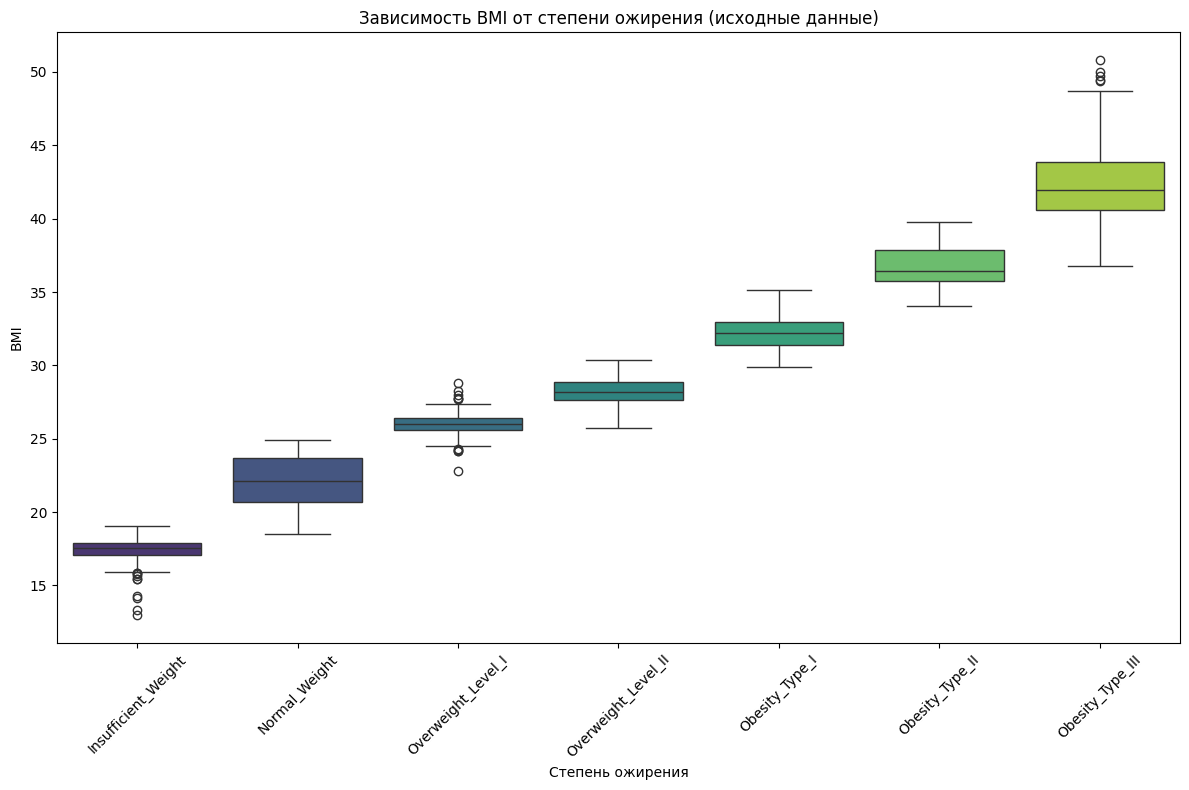

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== ИНФОРМАЦИЯ О ДАННЫХ ===
Размер обучающей выборки: 1477
Размер тестовой выборки: 634
Распределение классов в обучающей выборке:
  Insufficient_Weight: 190 наблюдений
  Normal_Weight: 201 наблюдений
  Overweight_Level_I: 203 наблюдений
  Overweight_Level_II: 203 наблюдений
  Obesity_Type_I: 245 наблюдений
  Obesity_Type_II: 208 наблюдений
  Obesity_Type_III: 227 наблюдений

=== ОБУЧЕНИЕ МОДЕЛИ: Logistic Regression ===
Точность (Accuracy): 0.9338

Отчет по классификации:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.99      0.96        82
      Normal_Weight       0.95      0.85      0.90        86
 Overweight_Level_I       0.89      0.94      0.92        87
Overweight_Level_II       0.98      0.94      0.96        87
     Obesity_Type_I       0.97      0.95      0.96       106
    Obesity_Type_II       0.87      0.93      0.90        89
   Obesity_Type_III       0.95      0.93      0.94        97

           accuracy              

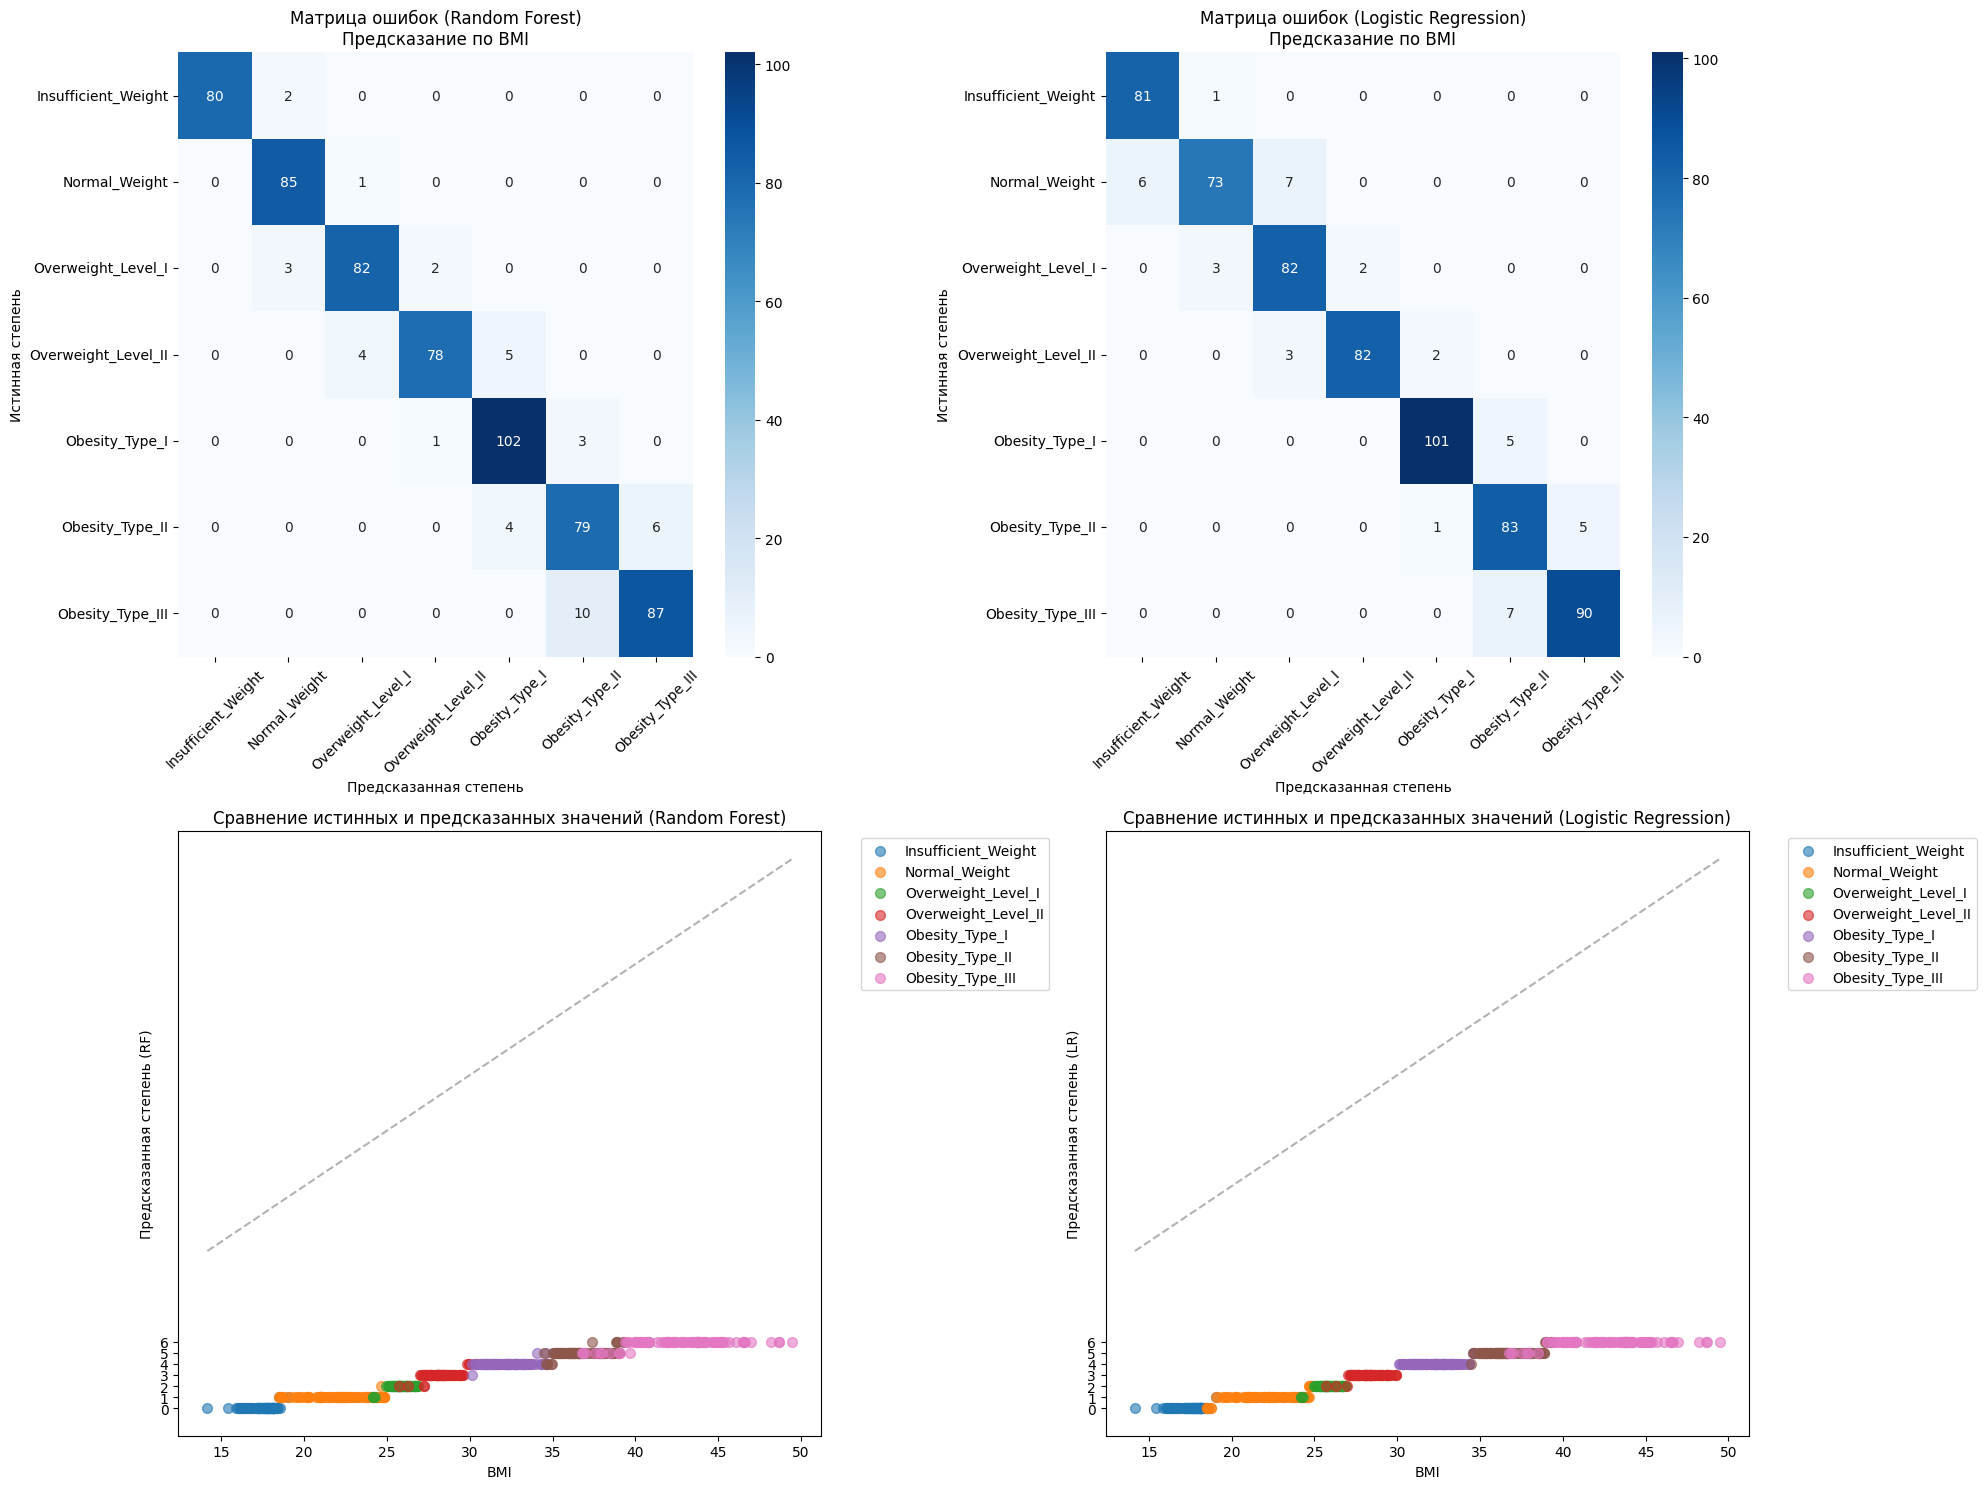

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


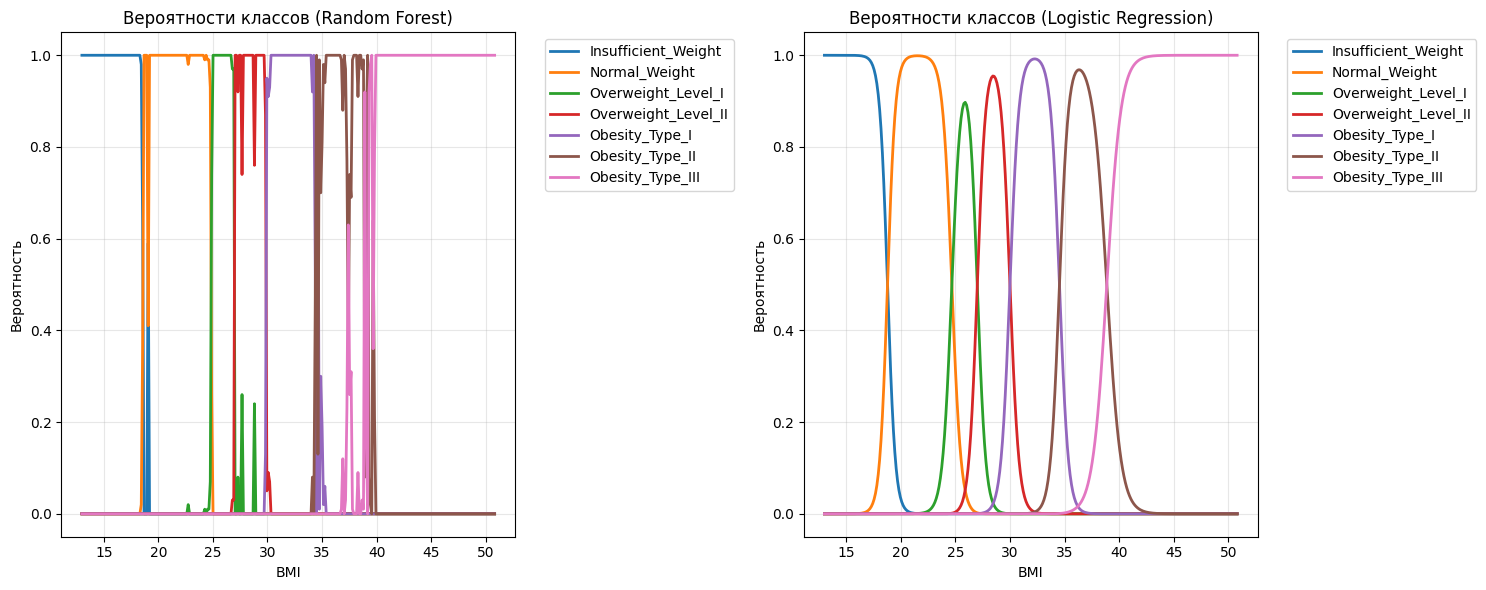


СВОДНЫЕ РЕЗУЛЬТАТЫ ПРЕДСКАЗАНИЯ ПО BMI
Лучшая модель: Random Forest
Точность лучшей модели: 0.9353

Интерпретация:
Модель может правильно предсказать степень ожирения по BMI в 93.5% случаев

АНАЛИЗ ОШИБОК:
Наиболее частые ошибки:
  Obesity_Type_III -> Obesity_Type_II: 10 случаев
  Obesity_Type_II -> Obesity_Type_III: 6 случаев
  Overweight_Level_II -> Obesity_Type_I: 5 случаев
  Overweight_Level_II -> Overweight_Level_I: 4 случаев
  Obesity_Type_II -> Obesity_Type_I: 4 случаев
  Overweight_Level_I -> Normal_Weight: 3 случаев
  Obesity_Type_I -> Obesity_Type_II: 3 случаев
  Insufficient_Weight -> Normal_Weight: 2 случаев
  Overweight_Level_I -> Overweight_Level_II: 2 случаев
  Normal_Weight -> Overweight_Level_I: 1 случаев

СРАВНЕНИЕ С БАЗОВЫМ УРОВНЕМ:
Точность наивного классификатора (всегда предсказывает самый частый класс): 0.1672
Улучшение по сравнению с базовым уровнем: 0.7681

ПРИМЕРЫ ПРЕДСКАЗАНИЙ ДЛЯ РАЗНЫХ BMI:
BMI -> Предсказанная степень ожирения
17 -> Insufficient_Weight (ве

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.

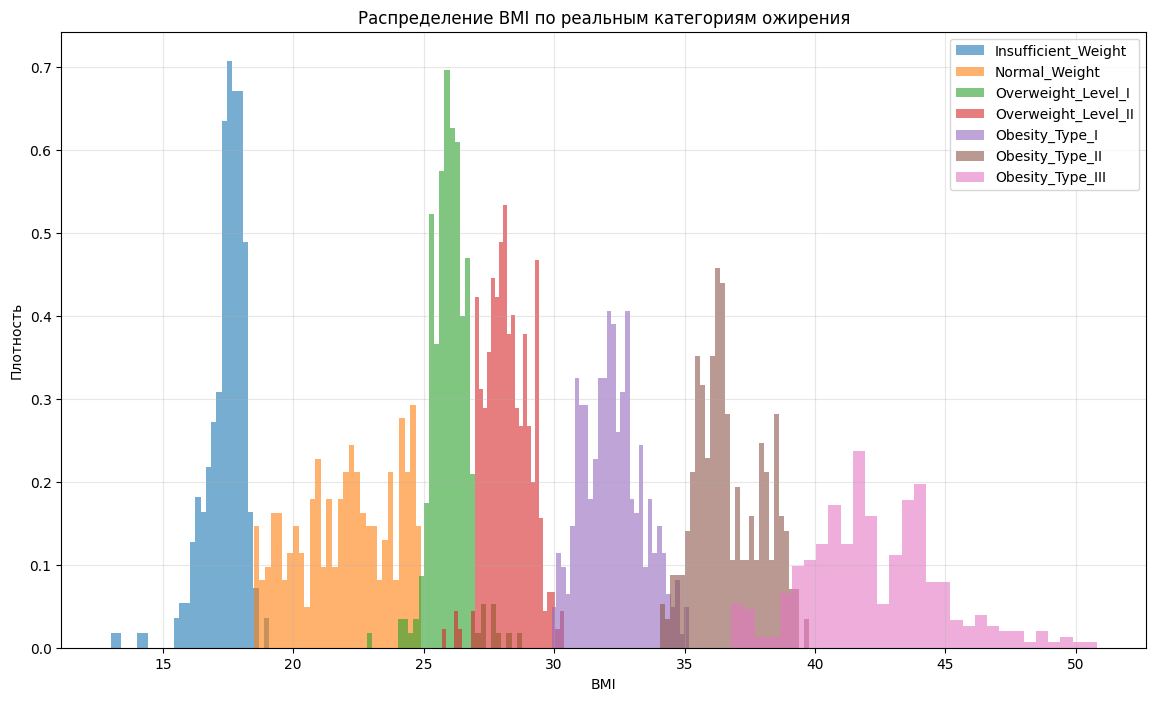


АНАЛИЗ ТОЧНОСТИ ПО КАТЕГОРИЯМ (Random Forest):
  Insufficient_Weight: 0.976
  Normal_Weight: 0.988
  Overweight_Level_I: 0.943
  Overweight_Level_II: 0.897
  Obesity_Type_I: 0.962
  Obesity_Type_II: 0.888
  Obesity_Type_III: 0.897


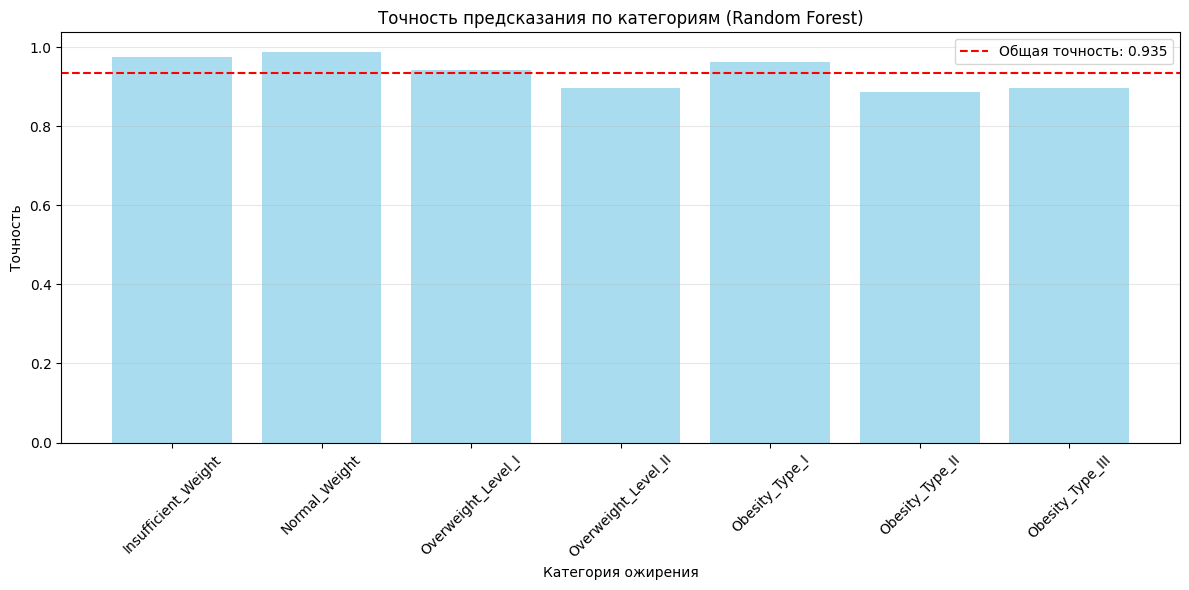

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Создаем BMI если еще не создан
# df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Определяем правильный порядок категорий ожирения по степени и mapping
obesity_mapping = {
    0: 'Insufficient_Weight',
    1: 'Normal_Weight', 
    2: 'Overweight_Level_I',
    3: 'Overweight_Level_II',
    4: 'Obesity_Type_I',
    5: 'Obesity_Type_II',
    6: 'Obesity_Type_III'
}

obesity_order = [
    'Insufficient_Weight',      # 0
    'Normal_Weight',            # 1
    'Overweight_Level_I',       # 2
    'Overweight_Level_II',      # 3
    'Obesity_Type_I',           # 4
    'Obesity_Type_II',          # 5
    'Obesity_Type_III'          # 6
]

# Создаем текстовую версию целевой переменной для визуализации
df['NObeyesdad_text'] = df['NObeyesdad'].map(obesity_mapping)

# 1. Визуализируем зависимость BMI от степени ожирения
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='NObeyesdad_text', y='BMI', order=obesity_order, palette='viridis')
plt.title('Зависимость BMI от степени ожирения (исходные данные)')
plt.xlabel('Степень ожирения')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Создаем простую модель на основе BMI
X = df[['BMI']]
y = df['NObeyesdad']  # Используем числовые коды для обучения

# Разделяем данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("=== ИНФОРМАЦИЯ О ДАННЫХ ===")
print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")
print(f"Распределение классов в обучающей выборке:")
class_distribution = y_train.value_counts().sort_index()
for class_id, count in class_distribution.items():
    print(f"  {obesity_mapping[class_id]}: {count} наблюдений")

# 3. Обучаем модели
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n=== ОБУЧЕНИЕ МОДЕЛИ: {name} ===")
    
    # Обучение
    model.fit(X_train, y_train)
    
    # Предсказания
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    # Оценка качества
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'accuracy': accuracy,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"Точность (Accuracy): {accuracy:.4f}")
    print("\nОтчет по классификации:")
    print(classification_report(y_test, y_pred, target_names=obesity_order))

# 4. Визуализация результатов
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Матрица ошибок для Random Forest
cm = confusion_matrix(y_test, results['Random Forest']['y_pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=obesity_order, yticklabels=obesity_order, ax=axes[0,0])
axes[0,0].set_title('Матрица ошибок (Random Forest)\nПредсказание по BMI')
axes[0,0].set_xlabel('Предсказанная степень')
axes[0,0].set_ylabel('Истинная степень')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].tick_params(axis='y', rotation=0)

# Матрица ошибок для Logistic Regression
cm_lr = confusion_matrix(y_test, results['Logistic Regression']['y_pred'])
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=obesity_order, yticklabels=obesity_order, ax=axes[0,1])
axes[0,1].set_title('Матрица ошибок (Logistic Regression)\nПредсказание по BMI')
axes[0,1].set_xlabel('Предсказанная степень')
axes[0,1].set_ylabel('Истинная степень')
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].tick_params(axis='y', rotation=0)

# Сравнение истинных и предсказанных значений
comparison_df = X_test.copy()
comparison_df['True_Label'] = y_test
comparison_df['Predicted_RF'] = results['Random Forest']['y_pred']
comparison_df['Predicted_LR'] = results['Logistic Regression']['y_pred']

# Визуализация предсказаний Random Forest
for true_class in range(7):
    class_data = comparison_df[comparison_df['True_Label'] == true_class]
    axes[1,0].scatter(class_data['BMI'], class_data['Predicted_RF'], 
                     alpha=0.6, label=obesity_order[true_class], s=50)
axes[1,0].plot([comparison_df['BMI'].min(), comparison_df['BMI'].max()], 
               [comparison_df['BMI'].min(), comparison_df['BMI'].max()], 
               'k--', alpha=0.3)
axes[1,0].set_xlabel('BMI')
axes[1,0].set_ylabel('Предсказанная степень (RF)')
axes[1,0].set_title('Сравнение истинных и предсказанных значений (Random Forest)')
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,0].set_yticks(range(7))
axes[1,0].set_yticklabels([f'{i}' for i in range(7)])

# Визуализация предсказаний Logistic Regression
for true_class in range(7):
    class_data = comparison_df[comparison_df['True_Label'] == true_class]
    axes[1,1].scatter(class_data['BMI'], class_data['Predicted_LR'], 
                     alpha=0.6, label=obesity_order[true_class], s=50)
axes[1,1].plot([comparison_df['BMI'].min(), comparison_df['BMI'].max()], 
               [comparison_df['BMI'].min(), comparison_df['BMI'].max()], 
               'k--', alpha=0.3)
axes[1,1].set_xlabel('BMI')
axes[1,1].set_ylabel('Предсказанная степень (LR)')
axes[1,1].set_title('Сравнение истинных и предсказанных значений (Logistic Regression)')
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1,1].set_yticks(range(7))
axes[1,1].set_yticklabels([f'{i}' for i in range(7)])

plt.tight_layout()
plt.show()

# 5. Анализ границ принятия решений
plt.figure(figsize=(15, 6))

# Создаем равномерно распределенные значения BMI для визуализации
bmi_range = np.linspace(df['BMI'].min(), df['BMI'].max(), 300).reshape(-1, 1)

# Предсказания для визуализации границ
rf_proba = results['Random Forest']['model'].predict_proba(bmi_range)
lr_proba = results['Logistic Regression']['model'].predict_proba(bmi_range)

# Визуализация вероятностей (Random Forest)
plt.subplot(1, 2, 1)
for i in range(7):
    plt.plot(bmi_range, rf_proba[:, i], label=obesity_order[i], linewidth=2)
plt.xlabel('BMI')
plt.ylabel('Вероятность')
plt.title('Вероятности классов (Random Forest)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Визуализация вероятностей (Logistic Regression)
plt.subplot(1, 2, 2)
for i in range(7):
    plt.plot(bmi_range, lr_proba[:, i], label=obesity_order[i], linewidth=2)
plt.xlabel('BMI')
plt.ylabel('Вероятность')
plt.title('Вероятности классов (Logistic Regression)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 6. Сводные результаты
print("\n" + "="*50)
print("СВОДНЫЕ РЕЗУЛЬТАТЫ ПРЕДСКАЗАНИЯ ПО BMI")
print("="*50)

best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_accuracy = results[best_model_name]['accuracy']

print(f"Лучшая модель: {best_model_name}")
print(f"Точность лучшей модели: {best_accuracy:.4f}")
print(f"\nИнтерпретация:")
print(f"Модель может правильно предсказать степень ожирения по BMI в {best_accuracy*100:.1f}% случаев")

# Анализ основных ошибок
print(f"\nАНАЛИЗ ОШИБОК:")
rf_pred = results['Random Forest']['y_pred']
misclassified = X_test[y_test != rf_pred].copy()
misclassified['True'] = y_test[y_test != rf_pred]
misclassified['Predicted'] = rf_pred[y_test != rf_pred]

if len(misclassified) > 0:
    print("Наиболее частые ошибки:")
    error_pairs = misclassified.groupby(['True', 'Predicted']).size().sort_values(ascending=False).head(10)
    for (true, pred), count in error_pairs.items():
        print(f"  {obesity_order[true]} -> {obesity_order[pred]}: {count} случаев")
else:
    print("Все предсказания верны!")

# 7. Сравнение с "наивным" классификатором
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)
dummy_accuracy = dummy.score(X_test, y_test)

print(f"\nСРАВНЕНИЕ С БАЗОВЫМ УРОВНЕМ:")
print(f"Точность наивного классификатора (всегда предсказывает самый частый класс): {dummy_accuracy:.4f}")
print(f"Улучшение по сравнению с базовым уровнем: {best_accuracy - dummy_accuracy:.4f}")

# 8. Примеры предсказаний для конкретных значений BMI
print(f"\nПРИМЕРЫ ПРЕДСКАЗАНИЙ ДЛЯ РАЗНЫХ BMI:")
test_bmis = [17, 22, 25, 28, 32, 38, 45]
print("BMI -> Предсказанная степень ожирения")
for bmi in test_bmis:
    prediction = results['Random Forest']['model'].predict([[bmi]])[0]
    probability = results['Random Forest']['model'].predict_proba([[bmi]])[0][prediction]
    print(f"{bmi} -> {obesity_order[prediction]} (вероятность: {probability:.3f})")

# 9. Дополнительный анализ: распределение BMI по реальным категориям
plt.figure(figsize=(14, 8))
for i in range(7):
    subset = df[df['NObeyesdad'] == i]
    plt.hist(subset['BMI'], bins=30, alpha=0.6, label=obesity_order[i], density=True)

plt.xlabel('BMI')
plt.ylabel('Плотность')
plt.title('Распределение BMI по реальным категориям ожирения')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 10. Анализ точности по категориям
print(f"\nАНАЛИЗ ТОЧНОСТИ ПО КАТЕГОРИЯМ (Random Forest):")
category_accuracy = {}
for i in range(7):
    mask = (y_test == i)
    if mask.sum() > 0:
        accuracy_category = accuracy_score(y_test[mask], results['Random Forest']['y_pred'][mask])
        category_accuracy[obesity_order[i]] = accuracy_category
        print(f"  {obesity_order[i]}: {accuracy_category:.3f}")

# Визуализация точности по категориям
plt.figure(figsize=(12, 6))
categories = list(category_accuracy.keys())
accuracies = list(category_accuracy.values())
plt.bar(categories, accuracies, color='skyblue', alpha=0.7)
plt.axhline(y=best_accuracy, color='red', linestyle='--', label=f'Общая точность: {best_accuracy:.3f}')
plt.xlabel('Категория ожирения')
plt.ylabel('Точность')
plt.title('Точность предсказания по категориям (Random Forest)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Подготовка данных для модели

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

# Финальные признаки
final_features = [
    'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 
    'CAEC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'BMI'
]

# Целевая переменная
target = 'NObeyesdad'

# Создаем финальный датасет
X = df[final_features]
y = df[target]

print(f"Размеры: X {X.shape}, y {y.shape}")

# 4.3. Определяем типы признаков для preprocessing
binary_features = ['family_history_with_overweight', 'FAVC']
ordinal_features = ['FCVC', 'NCP', 'CAEC', 'FAF', 'TUE', 'CALC']  # Есть естественный порядок
nominal_features = ['MTRANS']  # Нет естественного порядка
numerical_features = ['Age', 'BMI']  # Непрерывные числовые

print("\n=== ТИПЫ ПРИЗНАКОВ ДЛЯ ПРЕОБРАЗОВАНИЯ ===")
print(f"Бинарные ({len(binary_features)}): {binary_features}")
print(f"Порядковые ({len(ordinal_features)}): {ordinal_features}")
print(f"Номинальные ({len(nominal_features)}): {nominal_features}")
print(f"Числовые ({len(numerical_features)}): {numerical_features}")

# 4.4. Создаем порядки для ordinal features
ordinal_orders = {
    'FCVC': [1, 2, 3],  # Потребление овощей: редко -> часто
    'NCP': [1, 2, 3, 4],  # Количество приемов пищи: мало -> много
    'CAEC': [0, 1, 2, 3],  # Еда между приемами: нет -> иногда -> часто -> всегда
    'FAF': [0, 1, 2, 3],  # Физ активность: нет -> низкая -> средняя -> высокая
    'TUE': [0, 1, 2],  # Время за устройствами: мало -> среднее -> много
    'CALC': [0, 1, 2, 3]  # Алкоголь: нет -> иногда -> часто -> всегда
}

# 4.5. Создаем ColumnTransformer для preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('ord', OrdinalEncoder(categories=[ordinal_orders[col] for col in ordinal_features]), ordinal_features),
        ('nom', OneHotEncoder(drop='first', sparse_output=False), nominal_features),
        ('bin', 'passthrough', binary_features)  # Бинарные оставляем как есть
    ]
)

print("\n=== ПРЕОБРАЗОВАТЕЛЬ СОЗДАН ===")
print(preprocessor)

# 4.6. Разделяем данные с СТРАТИФИКАЦИЕЙ
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y  # ВАЖНО: стратификация по целевой переменной
)

print(f"\n=== РАЗДЕЛЕНИЕ ДАННЫХ ===")
print(f"Обучающая выборка: {X_train.shape[0]} наблюдений")
print(f"Тестовая выборка: {X_test.shape[0]} наблюдений")

# Проверяем стратификацию
print(f"\nРаспределение классов в исходных данных:")
print(y.value_counts(normalize=True).sort_index())
print(f"\nРаспределение классов в обучающей выборке:")
print(y_train.value_counts(normalize=True).sort_index())
print(f"\nРаспределение классов в тестовой выборке:")
print(y_test.value_counts(normalize=True).sort_index())

# 4.7. Применяем преобразования
print("\n=== ПРИМЕНЯЕМ ПРЕОБРАЗОВАНИЯ ===")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Получаем имена фичей после преобразования
feature_names = (
    numerical_features + 
    ordinal_features + 
    list(preprocessor.named_transformers_['nom'].get_feature_names_out(nominal_features)) +
    binary_features
)

print(f"\nРазмеры после преобразования:")
print(f"X_train_processed: {X_train_processed.shape}")
print(f"X_test_processed: {X_test_processed.shape}")
print(f"Имена признаков: {len(feature_names)}")
print(feature_names)

# 4.8. Сохраняем processed data для модели
processed_data = {
    'X_train': X_train_processed,
    'X_test': X_test_processed, 
    'y_train': y_train,
    'y_test': y_test,
    'feature_names': feature_names,
    'preprocessor': preprocessor
}

print("\n✅ ДАННЫЕ ПОДГОТОВЛЕНЫ ДЛЯ МОДЕЛИ!")

Размеры: X (2111, 11), y (2111,)

=== ТИПЫ ПРИЗНАКОВ ДЛЯ ПРЕОБРАЗОВАНИЯ ===
Бинарные (2): ['family_history_with_overweight', 'FAVC']
Порядковые (6): ['FCVC', 'NCP', 'CAEC', 'FAF', 'TUE', 'CALC']
Номинальные (1): ['MTRANS']
Числовые (2): ['Age', 'BMI']

=== ПРЕОБРАЗОВАТЕЛЬ СОЗДАН ===
ColumnTransformer(transformers=[('num', StandardScaler(), ['Age', 'BMI']),
                                ('ord',
                                 OrdinalEncoder(categories=[[1, 2, 3],
                                                            [1, 2, 3, 4],
                                                            [0, 1, 2, 3],
                                                            [0, 1, 2, 3],
                                                            [0, 1, 2],
                                                            [0, 1, 2, 3]]),
                                 ['FCVC', 'NCP', 'CAEC', 'FAF', 'TUE', 'CALC']),
                                ('nom',
                                 OneHotE

In [17]:
# Создаем DataFrame для проверки
train_df_processed = pd.DataFrame(X_train_processed, columns=feature_names)
test_df_processed = pd.DataFrame(X_test_processed, columns=feature_names)

print("=== ПРОВЕРКА ПРЕОБРАЗОВАННЫХ ДАННЫХ ===")
print("\nПервые 5 строк обучающей выборки:")
print(train_df_processed.head())
print(f"\nСтатистика по числовым признакам (должны быть ~N(0,1)):")
print(train_df_processed[['Age', 'BMI']].describe())

=== ПРОВЕРКА ПРЕОБРАЗОВАННЫХ ДАННЫХ ===

Первые 5 строк обучающей выборки:
        Age       BMI  FCVC  NCP  CAEC  FAF  TUE  CALC  MTRANS_2  MTRANS_3  \
0 -0.058509  1.105286   2.0  1.0   1.0  1.0  1.0   0.0       0.0       0.0   
1 -0.452080  2.472344   2.0  2.0   1.0  0.0  1.0   1.0       0.0       0.0   
2  2.425259  0.116281   1.0  1.0   1.0  1.0  1.0   1.0       0.0       0.0   
3  0.733350  0.748553   1.0  2.0   1.0  1.0  0.0   1.0       0.0       0.0   
4 -0.534788 -0.375383   1.0  0.0   0.0  1.0  0.0   1.0       0.0       0.0   

   MTRANS_4  MTRANS_5  family_history_with_overweight  FAVC  
0       0.0       1.0                             1.0   1.0  
1       0.0       1.0                             1.0   1.0  
2       1.0       0.0                             1.0   1.0  
3       0.0       1.0                             1.0   1.0  
4       0.0       1.0                             0.0   1.0  

Статистика по числовым признакам (должны быть ~N(0,1)):
                Age        

# Обучение модели

=== НАЧАЛО ОБУЧЕНИЯ МОДЕЛЕЙ (исправленная версия) ===

=== КРОСС-ВАЛИДАЦИЯ (5-fold) ===
Logistic Regression       | Accuracy: 0.8693 ± 0.0182
Random Forest             | Accuracy: 0.9648 ± 0.0066
K-Nearest Neighbors       | Accuracy: 0.8002 ± 0.0261
SVM                       | Accuracy: 0.9248 ± 0.0085

📊 Лучшая модель по кросс-валидации: Random Forest

=== ОБУЧЕНИЕ И ОЦЕНКА НА ТЕСТЕ ===

--- Logistic Regression ---
Accuracy: 0.8849

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.99      0.94        82
      Normal_Weight       0.90      0.73      0.81        86
 Overweight_Level_I       0.73      0.78      0.76        87
Overweight_Level_II       0.80      0.84      0.82        87
     Obesity_Type_I       0.93      0.91      0.92       106
    Obesity_Type_II       0.94      0.94      0.94        89
   Obesity_Type_III       0.98      0.99      0.98        97

           accuracy                           0.8

<Figure size 1200x600 with 0 Axes>

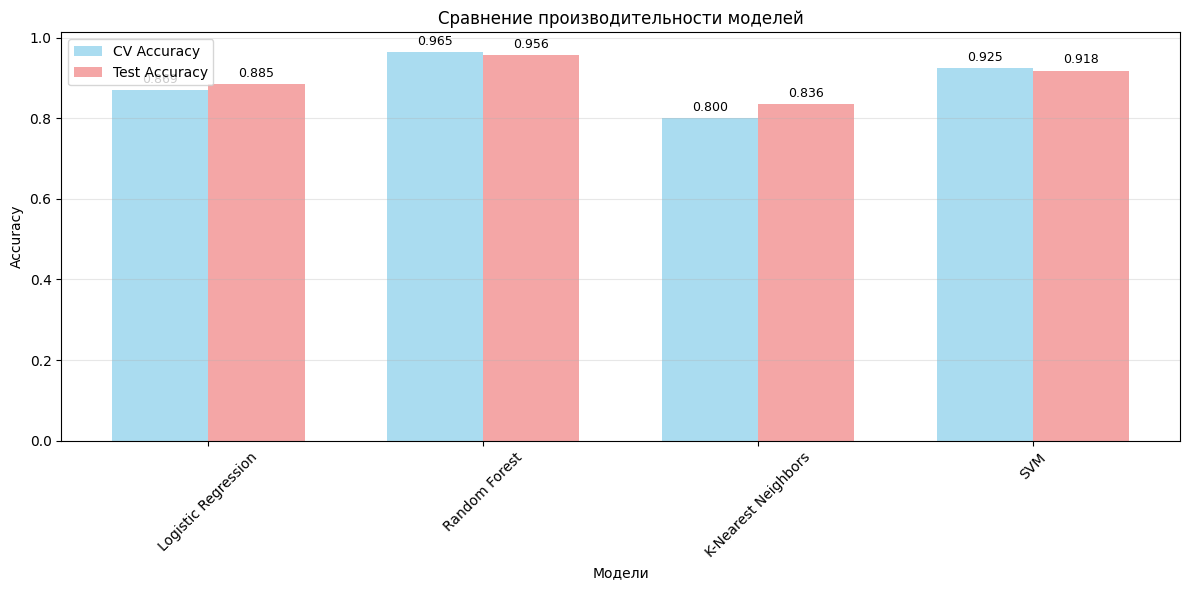

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(
        random_state=42, 
        max_iter=1000
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        random_state=42
    ),
    'K-Nearest Neighbors': KNeighborsClassifier(
        n_neighbors=5
    ),
    'SVM': SVC(
        random_state=42,
        probability=True
    )
}

print("=== НАЧАЛО ОБУЧЕНИЯ МОДЕЛЕЙ (исправленная версия) ===")

# Кросс-валидация для оценки стабильности моделей
print("\n=== КРОСС-ВАЛИДАЦИЯ (5-fold) ===")
cv_results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_processed, y_train, cv=5, scoring='accuracy')
    cv_results[name] = {
        'mean_score': cv_scores.mean(),
        'std_score': cv_scores.std(),
        'scores': cv_scores
    }
    print(f"{name:25} | Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Выбираем лучшую модель по кросс-валидации
best_cv_model = max(cv_results, key=lambda x: cv_results[x]['mean_score'])
print(f"\n📊 Лучшая модель по кросс-валидации: {best_cv_model}")

# Обучение и оценка на тестовой выборке
print("\n=== ОБУЧЕНИЕ И ОЦЕНКА НА ТЕСТЕ ===")
trained_models = {}
test_results = {}

for name, model in models.items():
    print(f"\n--- {name} ---")
    
    # Обучение
    model.fit(X_train_processed, y_train)
    trained_models[name] = model
    
    # Предсказания
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)
    
    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    
    test_results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=obesity_order))

# Сравнительная таблица результатов
print("\n" + "="*60)
print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ")
print("="*60)

results_summary = []
for name in models.keys():
    cv_mean = cv_results[name]['mean_score']
    cv_std = cv_results[name]['std_score']
    test_accuracy = test_results[name]['accuracy']
    
    results_summary.append({
        'Model': name,
        'CV Accuracy': f"{cv_mean:.4f} ± {cv_std:.4f}",
        'Test Accuracy': f"{test_accuracy:.4f}",
        'Difference': f"{(test_accuracy - cv_mean):.4f}"
    })

results_df = pd.DataFrame(results_summary)
print(results_df.to_string(index=False))

# Лучшая модель
best_test_model = max(test_results, key=lambda x: test_results[x]['accuracy'])
best_accuracy = test_results[best_test_model]['accuracy']

print(f"\n🏆 ЛУЧШАЯ МОДЕЛЬ: {best_test_model}")
print(f"Точность на тесте: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Визуализация сравнения моделей
plt.figure(figsize=(12, 6))

models_names = list(models.keys())
cv_means = [cv_results[name]['mean_score'] for name in models_names]
test_accuracies = [test_results[name]['accuracy'] for name in models_names]

x = np.arange(len(models_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, cv_means, width, label='CV Accuracy', alpha=0.7, color='skyblue')
bars2 = ax.bar(x + width/2, test_accuracies, width, label='Test Accuracy', alpha=0.7, color='lightcoral')

ax.set_xlabel('Модели')
ax.set_ylabel('Accuracy')
ax.set_title('Сравнение производительности моделей')
ax.set_xticks(x)
ax.set_xticklabels(models_names, rotation=45)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Добавляем значения на столбцы
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Попытка дообучить k-neighbours

=== ПОДБОР ОПТИМАЛЬНОГО КОЛИЧЕСТВА СОСЕДЕЙ ДЛЯ KNN ===
Сетка параметров для перебора:
n_neighbors: [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
weights: ['uniform', 'distance']
metric: ['euclidean', 'manhattan', 'minkowski']

Запуск GridSearchCV... (это может занять несколько минут)
Fitting 5 folds for each of 108 candidates, totalling 540 fits

✅ Поиск завершен!

🏆 ЛУЧШИЕ ПАРАМЕТРЫ:
n_neighbors: 9
weights: distance
metric: manhattan
Лучшая точность на кросс-валидации: 0.8449

=== АНАЛИЗ РЕЗУЛЬТАТОВ ПО КОЛИЧЕСТВУ СОСЕДЕЙ ===

Точность по количеству соседей:
 n_neighbors  mean_accuracy  std_accuracy  max_accuracy
           3       0.811206      0.015405      0.838859
           4       0.809955      0.021368      0.842240
           5       0.817854      0.014568      0.842238
           6       0.813905      0.017165      0.840222
           7       0.814805      0.014260      0.837503
           8       0.811080      0.017993      0.838848
           9       0.80

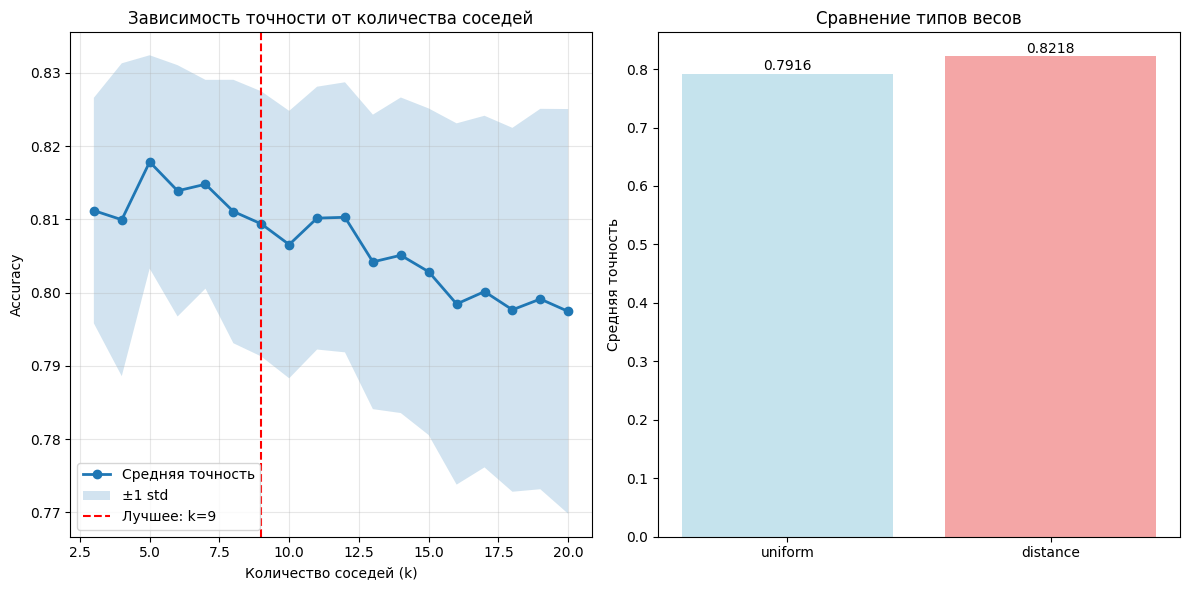


=== ОЦЕНКА ЛУЧШЕЙ МОДЕЛИ НА ТЕСТОВОЙ ВЫБОРКЕ ===
Точность лучшей KNN модели на тесте: 0.8596

Сравнение с базовой KNN (k=5):
Базовая KNN: 0.8360
Оптимизированная KNN: 0.8596
Улучшение: 0.0237 (2.37%)

Детальный отчет по лучшей KNN модели (k=9):
                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.96      0.90        82
      Normal_Weight       0.85      0.53      0.66        86
 Overweight_Level_I       0.68      0.83      0.75        87
Overweight_Level_II       0.86      0.83      0.84        87
     Obesity_Type_I       0.86      0.91      0.88       106
    Obesity_Type_II       0.94      0.93      0.94        89
   Obesity_Type_III       0.99      1.00      0.99        97

           accuracy                           0.86       634
          macro avg       0.86      0.86      0.85       634
       weighted avg       0.86      0.86      0.86       634



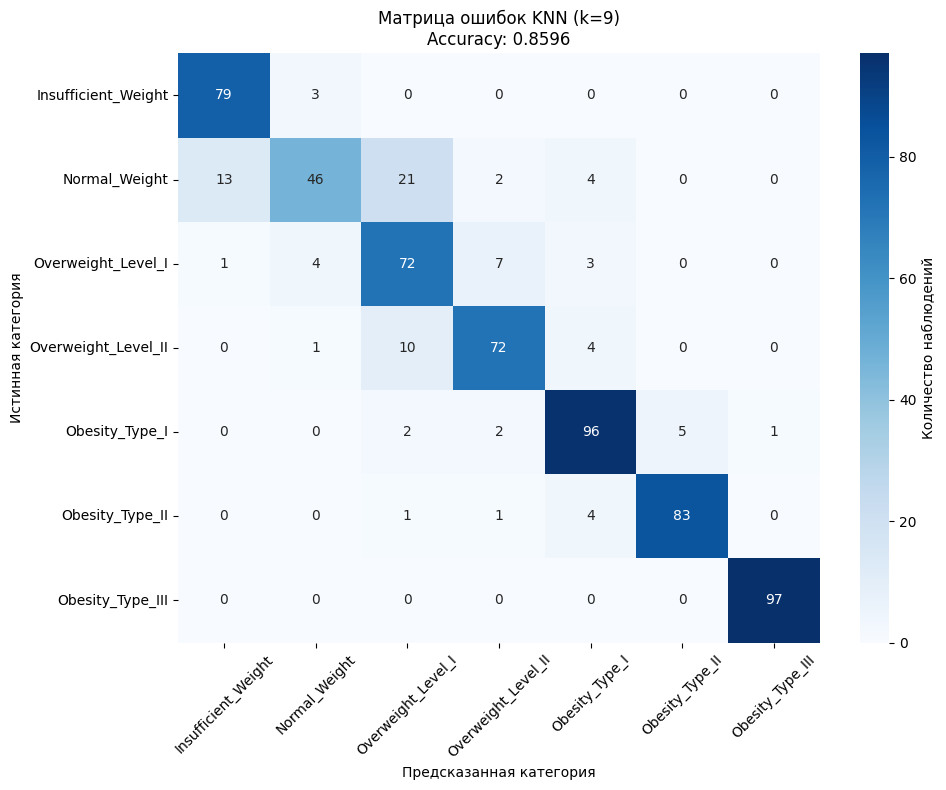


✅ Оптимизированная KNN модель сохранена!


In [20]:
from sklearn.model_selection import GridSearchCV

print("=== ПОДБОР ОПТИМАЛЬНОГО КОЛИЧЕСТВА СОСЕДЕЙ ДЛЯ KNN ===")

# 6.1. Создаем сетку параметров для перебора
param_grid = {
    'n_neighbors': range(3, 21),  # от 3 до 20 соседей
    'weights': ['uniform', 'distance'],  # равные веса или по расстоянию
    'metric': ['euclidean', 'manhattan', 'minkowski']  # метрики расстояния
}

print("Сетка параметров для перебора:")
print(f"n_neighbors: {list(param_grid['n_neighbors'])}")
print(f"weights: {param_grid['weights']}")
print(f"metric: {param_grid['metric']}")

# 6.2. Настраиваем GridSearchCV
knn = KNeighborsClassifier()
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # использовать все ядра процессора
    verbose=1
)

# 6.3. Запускаем поиск по сетке
print("\nЗапуск GridSearchCV... (это может занять несколько минут)")
grid_search.fit(X_train_processed, y_train)

print("\n✅ Поиск завершен!")

# 6.4. Выводим лучшие параметры
print(f"\n🏆 ЛУЧШИЕ ПАРАМЕТРЫ:")
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"n_neighbors: {best_params['n_neighbors']}")
print(f"weights: {best_params['weights']}")
print(f"metric: {best_params['metric']}")
print(f"Лучшая точность на кросс-валидации: {best_score:.4f}")

# 6.5. Анализ результатов по количеству соседей
print("\n=== АНАЛИЗ РЕЗУЛЬТАТОВ ПО КОЛИЧЕСТВУ СОСЕДЕЙ ===")

# Собираем результаты для каждого количества соседей
neighbors_results = {}
for i in range(len(grid_search.cv_results_['params'])):
    params = grid_search.cv_results_['params'][i]
    score = grid_search.cv_results_['mean_test_score'][i]
    n_neighbors = params['n_neighbors']
    
    if n_neighbors not in neighbors_results:
        neighbors_results[n_neighbors] = []
    neighbors_results[n_neighbors].append(score)

# Вычисляем среднюю точность для каждого количества соседей
neighbors_summary = []
for n_neighbors, scores in neighbors_results.items():
    neighbors_summary.append({
        'n_neighbors': n_neighbors,
        'mean_accuracy': np.mean(scores),
        'std_accuracy': np.std(scores),
        'max_accuracy': np.max(scores)
    })

neighbors_df = pd.DataFrame(neighbors_summary).sort_values('n_neighbors')
print("\nТочность по количеству соседей:")
print(neighbors_df.to_string(index=False))

# 6.6. Визуализация зависимости точности от количества соседей
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(neighbors_df['n_neighbors'], neighbors_df['mean_accuracy'], 
         marker='o', linewidth=2, markersize=6, label='Средняя точность')
plt.fill_between(neighbors_df['n_neighbors'], 
                 neighbors_df['mean_accuracy'] - neighbors_df['std_accuracy'],
                 neighbors_df['mean_accuracy'] + neighbors_df['std_accuracy'],
                 alpha=0.2, label='±1 std')

plt.axvline(x=best_params['n_neighbors'], color='red', linestyle='--', 
            label=f'Лучшее: k={best_params["n_neighbors"]}')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Accuracy')
plt.title('Зависимость точности от количества соседей')
plt.legend()
plt.grid(True, alpha=0.3)

# 6.7. Сравнение весов (uniform vs distance)
plt.subplot(1, 2, 2)
weights_comparison = {'uniform': [], 'distance': []}
metrics_comparison = {'euclidean': [], 'manhattan': [], 'minkowski': []}

for i in range(len(grid_search.cv_results_['params'])):
    params = grid_search.cv_results_['params'][i]
    score = grid_search.cv_results_['mean_test_score'][i]
    weights_comparison[params['weights']].append(score)
    metrics_comparison[params['metric']].append(score)

# График сравнения весов
weights_means = [np.mean(weights_comparison['uniform']), np.mean(weights_comparison['distance'])]
weights_labels = ['uniform', 'distance']
colors = ['lightblue', 'lightcoral']

plt.bar(weights_labels, weights_means, color=colors, alpha=0.7)
plt.ylabel('Средняя точность')
plt.title('Сравнение типов весов')
for i, v in enumerate(weights_means):
    plt.text(i, v + 0.001, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 6.8. Оценка лучшей модели на тестовой выборке
print("\n=== ОЦЕНКА ЛУЧШЕЙ МОДЕЛИ НА ТЕСТОВОЙ ВЫБОРКЕ ===")
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_processed)
test_accuracy = accuracy_score(y_test, y_pred_best)

print(f"Точность лучшей KNN модели на тесте: {test_accuracy:.4f}")

# Сравнение с базовой KNN
base_knn_accuracy = test_results['K-Nearest Neighbors']['accuracy']
improvement = test_accuracy - base_knn_accuracy

print(f"\nСравнение с базовой KNN (k=5):")
print(f"Базовая KNN: {base_knn_accuracy:.4f}")
print(f"Оптимизированная KNN: {test_accuracy:.4f}")
print(f"Улучшение: {improvement:.4f} ({improvement*100:.2f}%)")

# 6.9. Детальный отчет по лучшей модели
print(f"\nДетальный отчет по лучшей KNN модели (k={best_params['n_neighbors']}):")
print(classification_report(y_test, y_pred_best, target_names=obesity_order))

# 6.10. Матрица ошибок для лучшей KNN
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=obesity_order, 
            yticklabels=obesity_order,
            cbar_kws={'label': 'Количество наблюдений'})
plt.title(f'Матрица ошибок KNN (k={best_params["n_neighbors"]})\nAccuracy: {test_accuracy:.4f}')
plt.xlabel('Предсказанная категория')
plt.ylabel('Истинная категория')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 6.11. Сохраняем лучшую модель
trained_models['KNN_optimized'] = best_knn
test_results['KNN_optimized'] = {
    'model': best_knn,
    'y_pred': y_pred_best,
    'accuracy': test_accuracy,
    'params': best_params
}

print(f"\n✅ Оптимизированная KNN модель сохранена!")

# Анализ результатов

BMI-группировка: 93.89%
Logistic Regression (только BMI): 93.38%
Random Forest (только BMI): 93.53%

Вывод: BMI один объясняет 94% дисперсии! Это медицински обоснованно - BMI напрямую определяет категории ожирения.  
Random Forest (все признаки): 95.58%
Улучшение: +2.05% (с 93.53% до 95.58%)

Вывод: Дополнительные признаки добавляют всего 2% точности. Это говорит о том, что:
BMI доминирует над всеми другими признаками
Остальные признаки вносят небольшой, но значимый вклад



🎯 КЛЮЧЕВЫЕ ВЫВОДЫ 
Что работает:  
✅ BMI - король признаков - один параметр дает 94% точности  
✅ Random Forest - лучший алгоритм для этих данных  
✅ Семейная история + пищевые привычки - добавляют 2% ценной информации  

Что не так важно:  
❌ Большинство дополнительных признаков имеют ограниченное влияние  
❌ Сложные преобразования дают малый прирост  